# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#base url
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q=" #+city
#listing city data
cityData =[]

#grouping variables
set_count = 1
record = 1

print("Beginning Data Retrieval")
print("---------------------------")

for i, city in enumerate(cities):
    #groups of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record = 1
        
       #output the record and group being processed
    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    #increase the record count
    record += 1
    
    #create the url that includes the city
    cityURL = url + city
    
    #call API and make a request
    
    try:
        cityWeather = requests.get(cityURL).json()
        lat = cityWeather["coord"]["lat"]
        lon = cityWeather["coord"]["lon"]
        country = cityWeather["sys"]["country"]
        maxTemp = cityWeather["main"]["temp_max"]
        humidity = cityWeather["main"]["humidity"]
        cloudiness = cityWeather["clouds"]["all"]
        windspeed = cityWeather["wind"]["speed"]
        date = cityWeather["dt"]
        
        cityData.append({"City": city,
                        "country": country,
                        # "Country": country,
                        "Lat": lat,
                        "Lon": lon,
                        "Max Temp": maxTemp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind Speed": windspeed,
                        "Date": date})
        
    except:
        print(f"{city} not found. Skipping...")
        pass

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | makakilo city
Processing Record 2 of Set 1 | axim
Processing Record 3 of Set 1 | pochutla
Processing Record 4 of Set 1 | nizhneyansk
nizhneyansk not found. Skipping...
Processing Record 5 of Set 1 | gwembe
Processing Record 6 of Set 1 | wahpeton
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hit
Processing Record 13 of Set 1 | centenario do sul
Processing Record 14 of Set 1 | chomun
chomun not found. Skipping...
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | san quintin
Processing Record 21 of Set 1 | newport
Processing Record 22 of Set 1

Processing Record 38 of Set 4 | moindou
Processing Record 39 of Set 4 | gongzhuling
Processing Record 40 of Set 4 | moba
Processing Record 41 of Set 4 | mitsamiouli
Processing Record 42 of Set 4 | batticaloa
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | phnum penh
phnum penh not found. Skipping...
Processing Record 46 of Set 4 | karasburg
Processing Record 47 of Set 4 | hobart
Processing Record 48 of Set 4 | kahului
Processing Record 49 of Set 4 | pontes e lacerda
Processing Record 50 of Set 4 | owando
Processing Record 1 of Set 5 | vostok
Processing Record 2 of Set 5 | vila velha
Processing Record 3 of Set 5 | barentsburg
barentsburg not found. Skipping...
Processing Record 4 of Set 5 | sentyabrskiy
sentyabrskiy not found. Skipping...
Processing Record 5 of Set 5 | lilongwe
Processing Record 6 of Set 5 | aasiaat
Processing Record 7 of Set 5 | cairns
Processing Record 8 of Set 5 | taoudenni
Processing Record 9 of Set 5 |

Processing Record 20 of Set 8 | ayan
Processing Record 21 of Set 8 | ambatondrazaka
Processing Record 22 of Set 8 | mahendragarh
Processing Record 23 of Set 8 | port blair
Processing Record 24 of Set 8 | kenai
Processing Record 25 of Set 8 | itupiranga
Processing Record 26 of Set 8 | faya
Processing Record 27 of Set 8 | grand centre
grand centre not found. Skipping...
Processing Record 28 of Set 8 | labuhan
Processing Record 29 of Set 8 | charters towers
Processing Record 30 of Set 8 | maniwaki
Processing Record 31 of Set 8 | japura
Processing Record 32 of Set 8 | vila franca do campo
Processing Record 33 of Set 8 | richards bay
Processing Record 34 of Set 8 | yuncheng
Processing Record 35 of Set 8 | havelock
Processing Record 36 of Set 8 | jam sahib
Processing Record 37 of Set 8 | flinders
Processing Record 38 of Set 8 | jingdezhen
Processing Record 39 of Set 8 | zhuzhou
Processing Record 40 of Set 8 | vaitupu
vaitupu not found. Skipping...
Processing Record 41 of Set 8 | yumen
Proces

Processing Record 8 of Set 12 | siguiri
Processing Record 9 of Set 12 | giddarbaha
Processing Record 10 of Set 12 | castilho
Processing Record 11 of Set 12 | poso
Processing Record 12 of Set 12 | merauke
Processing Record 13 of Set 12 | poselki
Processing Record 14 of Set 12 | lumberton
Processing Record 15 of Set 12 | kruisfontein
Processing Record 16 of Set 12 | hagi
Processing Record 17 of Set 12 | newton
Processing Record 18 of Set 12 | grindavik
Processing Record 19 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 20 of Set 12 | eregli
Processing Record 21 of Set 12 | rungata
rungata not found. Skipping...
Processing Record 22 of Set 12 | ouadda
Processing Record 23 of Set 12 | muli
Processing Record 24 of Set 12 | gotsu
Processing Record 25 of Set 12 | xining
Processing Record 26 of Set 12 | dzhusaly
dzhusaly not found. Skipping...
Processing Record 27 of Set 12 | shekhupura
Processing Record 28 of Set 12 | ust-kulom
Processing Record 29 of Set 12 | wattegama
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cityData_pd = pd.DataFrame(cityData)
cityData_pd

,City,country,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,makakilo city,US,21.3469,-158.0858,72.68,73,1,5.75,1621691464
1,axim,GH,4.8699,-2.2405,86.36,62,56,9.46,1621691615
2,pochutla,MX,15.7432,-96.4661,84.81,52,2,2.33,1621691616
3,gwembe,ZM,-16.4975,27.6069,74.97,28,0,9.73,1621691616
4,wahpeton,US,46.2652,-96.6059,73.62,78,40,9.22,1621691616
...,...,...,...,...,...,...,...,...,...
570,villa carlos paz,AR,-31.4241,-64.4978,58.06,45,0,8.01,1621691782
571,gusinoye ozero,RU,51.1144,106.2614,44.46,37,100,17.85,1621691783
572,agadez,NE,19.7500,10.2500,104.36,6,0,11.30,1621691783
573,santa isabel do rio negro,BR,-0.4139,-65.0192,85.57,67,95,5.59,1621691783


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

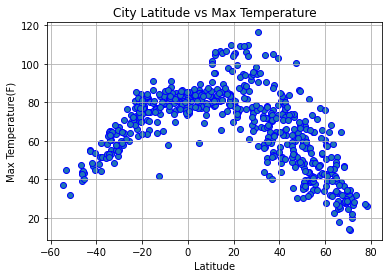

In [14]:
plt.scatter(cityData_pd['Lat'], cityData_pd['Max Temp'], marker="o", edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs Max Temperature")
plt.grid(True)

# Save
plt.savefig("City Latitude vs Max Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

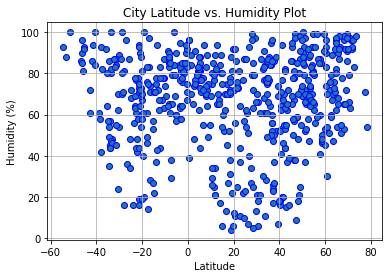

In [15]:
plt.scatter(cityData_pd['Lat'], cityData_pd['Humidity'], marker="o", edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity Plot")
plt.grid(True)

# Save
plt.savefig("City Latitude vs. Humidity Plot.png")

plt.show()

## Latitude vs. Cloudiness Plot

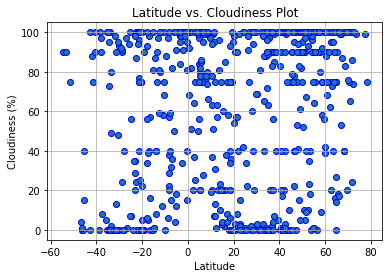

In [16]:
plt.scatter(cityData_pd['Lat'], cityData_pd['Cloudiness'], marker="o", edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness Plot")
plt.grid(True)

# Save
plt.savefig("Latitude vs. Cloudiness Plot.png")

plt.show()

## Latitude vs. Wind Speed Plot

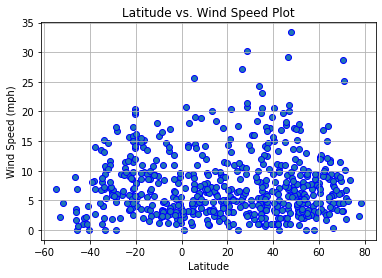

In [17]:
plt.scatter(cityData_pd['Lat'], cityData_pd['Wind Speed'], marker="o", edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed Plot")
plt.grid(True)

# Save
plt.savefig("Latitude vs. Wind Speed Plot.png")

plt.show()

## Linear Regression

In [26]:
Northern = cityData_pd.loc[(cityData_pd["Lat"] > 0)]
# len
Southern = cityData_pd.loc[(cityData_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

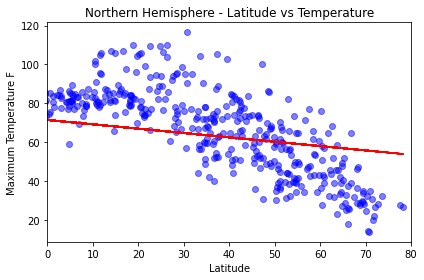

In [40]:
# Set limits and generate scatterplot
plt.xlim(0, 80)
plt.scatter(cityData_pd["Lat"], cityData_pd["Max Temp"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(cityData_pd["Lat"], cityData_pd["Max Temp"])
regress_values = cityData_pd["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(cityData_pd["Lat"],regress_values,"r-")
plt.annotate(line_eq,(3,0),fontsize=15,color="blue")

#Add title and labels
plt.title("Northern Hemisphere - Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature F")
plt.tight_layout()
plt.savefig("Northern_lat_vs_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

KeyError: 'Maximum_Temp'

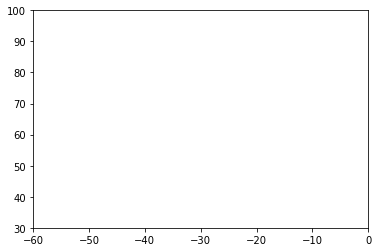

In [34]:
# Set limits and generate scatterplot
plt.xlim(-60, 0)
plt.ylim(30, 100)
plt.scatter(cityData_pd["Lat"], cityData_pd["Maximum Temp"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data["Lat"], weather_data["Maximum Temp"])
regress_values = weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55, 40),fontsize=15,color="blue")

#Add title and labels
plt.title("Southern Hemisphere - Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature F")
plt.tight_layout()
plt.savefig("../Output/southern_lat_vs_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Set limits and generate scatterplot
plt.xlim(0, 80)
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data["Lat"], weather_data["Humidity"])
regress_values = weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45, 18),fontsize=15,color="blue")

#Add title and labels
plt.title("Northern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.savefig("../Output/northern_lat_vs_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Set limits and generate scatterplot
plt.xlim(-60, 0)
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data["Lat"], weather_data["Humidity"])
regress_values = weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55, 14),fontsize=15,color="blue")

#Add title and labels
plt.title("Southern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../Output/southern_lat_vs_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Set limits and generate scatterplot
plt.xlim(0, 80)
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data["Lat"], weather_data["Cloudiness"])
regress_values = weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45, 12),fontsize=15,color="red")

#Add title and labels
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.savefig("../Output/northern_lat_vs_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Set limits and generate scatterplot
plt.xlim(-60, 0)
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data["Lat"], weather_data["Cloudiness"])
regress_values = weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-59, 23),fontsize=15,color="red")

#Add title and labels
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Output/southern_lat_vs_cloudiness.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Set limits and generate scatterplot
plt.xlim(0, 80)
plt.scatter(weather_data["Lat"], weather_data["Wind"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data["Lat"], weather_data["Wind"])
regress_values = weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(4, 27),fontsize=15,color="red")

#Add title and labels
plt.title("Northern Hemisphere - Latitude vs Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("../Output/northern_lat_vs_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Set limits and generate scatterplot
plt.xlim(-60, 0)
plt.scatter(weather_data["Lat"], weather_data["Wind"], color='b', alpha=0.5)

#Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data["Lat"], weather_data["Wind"])
regress_values = weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55, 27),fontsize=15,color="red")

#Add title and labels
plt.title("Southern Hemisphere - Latitude vs Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("../Output/southern_lat_vs_wind.png")
plt.show()